**שימו לב**: על מנת להריץ את התאים ב-Live Code, יש לייבא תחילה את ספרית `numpy` ע"י הרצת השורת הבאה:

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import imageio
import utils.load_auxilary_files # This will load the files used for this notebook

# פעולות בסיסיות על מערכי `numpy` ותמונות

ביחידה זו נכיר תכונות ופעולות שונות שניתן לבצע במערכי `numpy`, ונדגים אותם על המערכים "רגילים" כמו גם על מערכים המייצגים תמונות.

## מימדי המטריצה

### גישה למימדי מטריצה קיימת

נתחיל מהגדרת המטריצה הבאה:

In [3]:
b = np.array([[3, 4, 5], [6, 7, 8]])
print('b is \n' , b)

b is 
 [[3 4 5]
 [6 7 8]]


למדנו ביחידות הקודמות ש`len` תחזיר לנו את **אורך** האובייקט. מה לדעתם הערך שיוחזר מ`len` עבור המטריצה שלנו? 

In [4]:
print(len(b))

2



כלומר, עבור מערכי `numpy`, `len` מחזירה את **מספר השורות** במטריצה.  
במערך חד-מימדי `len` תחזיר את מספר האלמנטים במערך, בדומה לרשימה.

ואם נרצה לקבל את כל מימדי המטריצה שלנו? לצורך כך נשתמש בתכונה `shape`:

In [5]:
print(b.shape)

(2, 3)


### שינוי מימדי מטריצות קיימות

ניתן גם **לשחלף** את המטריצה שלנו ע"י שימוש בתכונה `T` (כמו Transpose).   
שימו לך שמימדי המטריצה המשוחלפת התהפכו!

In [6]:
print('b is \n',b)
print('b transposed is \n',b.T)
print('b transposed dimensions are: ',b.T.shape)

b is 
 [[3 4 5]
 [6 7 8]]
b transposed is 
 [[3 6]
 [4 7]
 [5 8]]
b transposed dimensions are:  (3, 2)


מלבד שחלוף, קיימת פונקציה בשם `reshape`, המאפשרת לשנות את מבנה המטריצה. מתודה זה תשים את האיברים של המטריצה המקורית, **לפי סדר השורות**, במטריצה חדשה בעלת מימדים שהועברו בקלט.


In [7]:
c = b.reshape((3,2))
print(c)

[[3 4]
 [5 6]
 [7 8]]


```{admonition} **שימו לב **
:class: warning
המימדים המועברים בקלט המתודה `reshape` חייבים לייצג מטריצה אשר תכיל את כל איברי המערך ממנו הופעלה המתודה. אחרת נקבל שגיאה.

לדוגמאות לעיל, פלט המתודה `reshape` אינו זהה למטריצה המשוחלפת, זאת מכיוון שבמטריצה המשוחלפת השורות הופכות לעמודות, וב-`reshape` סדר האיברים לפני שורות נשמר 
```



כעת נדגים מה כיצד הפעולות שראינו למעלה מתבטאות במטריצות המייצגות תמונות:

על מנת לקבל את מספר השורות והעמודות בתמונה נוכל להשתמש בתכונה `shape`:

In [8]:
im_dog = imageio.v3.imread('files/dog.png')
print(im_dog) 

[[ 88  88  88 ...  61  60  60]
 [ 89  88  88 ...  61  60  60]
 [ 89  89  89 ...  61  61  61]
 ...
 [143 143 145 ... 103 102 102]
 [144 145 149 ... 103 102 102]
 [144 145 149 ... 103 102 102]]


In [9]:
print(im_dog.shape)

(302, 335)


ועל מנת להפוך את התמונה על צידה נוכל להשתמש בתכונה `T`

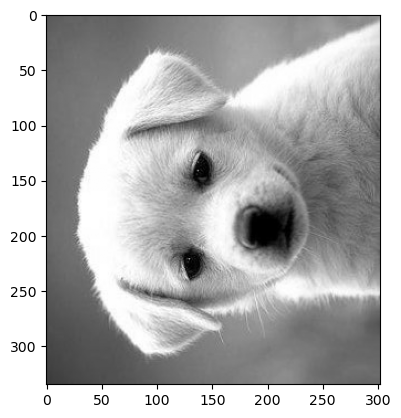

In [10]:
im_transposed = im_dog.T
plt.imshow(im_transposed,cmap='gray')

## גישה לערכים במטריצה

### חילוץ ערך בודד ממטריצה

בדומה לרשימות, גם ב`numpy` ניתן לגשת לערכים ספציפיים בתמונה, כולל Slicing. 

הייחודיות של Numpy היא שניתן לגשת לאיבר (או איברים) במטריצה (לדוגמא, `mat`) ע"י אינדקס השורות (`x`) והעמודות (`y`) יחדיו בתוך הסוגריים המרובעים בצורה הבאה: `mat[x,y]` 

נדגים זאת בקוד הבא:

תחילה ניצור מטריצה 3X3 של סדרת המספרים בין 0 ל8:

In [11]:
a=np.arange(9).reshape((3,3))
print(a)

[[0 1 2]
 [3 4 5]
 [6 7 8]]


כעת נחלץ את האיבר האמצעי של המטריצה:

In [12]:
print(a[1, 1])

4


כלומר, חילצנו את האיבר שנמצא באינקס 1 של השורות (שורה שניה) ובאינדקס 1 של עמודות (עמודה שניה):

### חילוץ תתי מטריצות

כדי להחזיר שורה שלמה, פשוט לא נעביר אינדקס עמודות. לדוגמא, כך נחזיר את כל השורה השניה:

In [13]:
print(a[1])

[3 4 5]


ומה עם נרצה להחזיר את כל העמודה השניה? חייבים לשים משהו לפני הפסיק...   
במקרה זה, נשים פשוט נקודותיים `:` בדומה לslciing נקודותיים מחזירה את כל הטווח (כלומר, את כל השורות).

לדוגמא, כך נחזיר את העמודה השניה:

In [14]:
print(a[:,1])

[1 4 7]


באופן אנלוגי לרשימות, גם כאן ניתן לבצע השמות של איבורים למטריצה קיימת באמצעות פירוט אינדקסים הרלוונטיים:

In [15]:
a[1, 1] = 10
print(a)

[[ 0  1  2]
 [ 3 10  5]
 [ 6  7  8]]


ניתן גם להחזיר או לבצע הרשמה על תת-קבוצה של שורות/עמודות. לדוגמא:

In [16]:
a[0,0:2] = a[2,1:3]*10
print(a)

[[70 80  2]
 [ 3 10  5]
 [ 6  7  8]]


ניתן אף לפרט בדיוק אילו אינדקסים רוצים להחזיר ובאיזה סדר באמצעות רשימה (או Iterable מספרי אחר) בשורות את בעמודות. לדוגמא:

In [17]:
print(a[[2,1,2], 2])

[8 5 8]


#### תרגול: החזרת תתי-מטריצות באמצעות Slicing

תחילה נגדיר את המטריצה `mat` הבאה:

In [18]:
mat= np.array([[0, 1, 2,3,4,5],
            [10, 11, 12,13,14,15],
            [20, 21, 22,23,24,25],
            [30, 31, 32,33,34,35],
            [40, 41, 42,43,44,45],
            [50, 51, 52,53,54,55]])
print(mat)

[[ 0  1  2  3  4  5]
 [10 11 12 13 14 15]
 [20 21 22 23 24 25]
 [30 31 32 33 34 35]
 [40 41 42 43 44 45]
 [50 51 52 53 54 55]]


כעת, עבור כל אחת מארבעת הצבעים במטריצה להלן, כתוב **שורה בודדת** המבצעת Slicing על `mat` כדי לקבל את תת-מטריצה המסומנת ע"י אותו הצבע:  

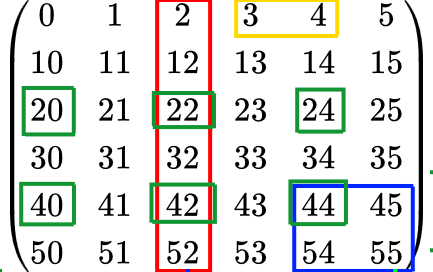

#### <span style='color:orange'> חיתוך שורות </span>

In [19]:
# Write you code here

```{admonition} **פתרון**
:class: dropdown, tip
    print(mat[0,3:5])
```

#### <span style='color:red'> חיתוך עמודות </span>

In [20]:
# Write you code here

```{admonition} **פתרון**
:class: dropdown, tip
    print(mat[:,2])
```

#### <span style='color:blue'>תת מטריצה רציפה </span>

In [21]:
# Write you code here

```{admonition} **פתרון**
:class: dropdown, tip
    print(mat[4:,4:])
```


#### <span style='color:green'> תת-מטריצה עם קפיצות </span>

In [22]:
# Write you code here

```{admonition} **פתרון**
:class: dropdown, tip
    print(mat[2::2,::2])
```

### עריכת מטריצה קיימת

באופן אנלוגי לרשימות, גם כאן ניתן לערוך מטריצה קיימת באמצעות השמה.

ניצור תחילה מטריצה חדשה כפי שעשינו קודם:

In [23]:
a=np.arange(9).reshape((3,3))
print(a)

[[0 1 2]
 [3 4 5]
 [6 7 8]]


כעת נבצע **השמה של איברים** למטריצה קיימת באמצעות פירוט האינדקסים הרלוונטיים:

In [24]:
a[1, 1] = 10
print(a)

[[ 0  1  2]
 [ 3 10  5]
 [ 6  7  8]]


ניתן גם לבצע השמה על חלק מהשורות או העמודות. לדוגמא:

In [25]:
a[0,0:2] = a[2,1:3]*10
print(a)

[[70 80  2]
 [ 3 10  5]
 [ 6  7  8]]


מאחר שתמונות הן מטריצות מספרים בטווח 0-256, ניתן **לערוך תמונות באמצעות שינוי ערכי המטריצה**. 

למטה נראה שתי דוגמאות לעריכת תמונה באמצעות Slicing.

נתחיל מקטע הקוד הבא:

In [26]:
new_fig = np.zeros((100,100))
new_fig[::2,::2] = 255

ודאו שהבנתם כיצד שתי השורות ההלו יוצרות את התמונה המופיעה למטה:

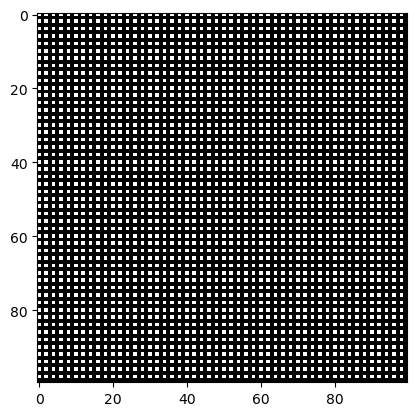

In [27]:
plt.imshow(new_fig, cmap=plt.cm.gray)

כעת, נניח שאנחנו רוצים להציג תמונה ברזולוציה נמוכה יותר, כלומר, לייצג תמונה עם פחות פיקסלים בזכרון (חשבו: מדוע שנרצה לעשות זאת?).
בדוגמא הבאה, עבור ריבועים (לא חופפים) של 10X10 פיקסלים, נשאיר את הפיקסל השמאלי העליון:

In [28]:
im2=im_dog[::10,::10]

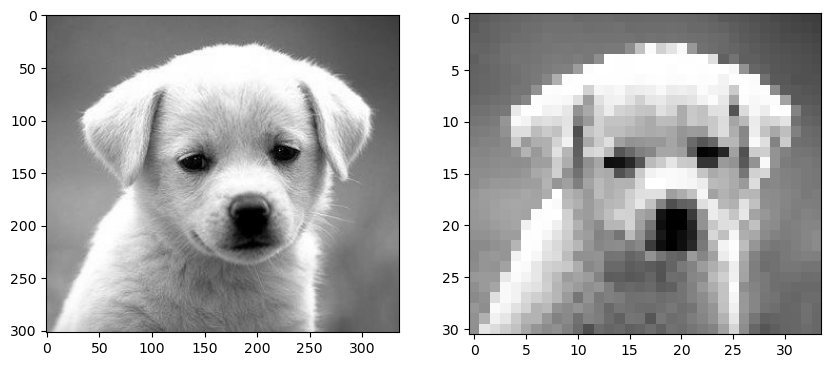

In [29]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(im_dog, cmap=plt.cm.gray)
plt.subplot(1, 2, 2)
plt.imshow(im2, cmap=plt.cm.gray)

In [30]:
import json
from jupyterquiz import display_quiz

example = '''
[
  {
    "question": "אם הייתה לנו תמונה ריבועית בגודל 50 על 50 פיקסלים, כמה פיקסלים יהיו בה במקור?",
    "type": "numeric",
    "answers": [
      {
        "type": "value",
        "value": 2500,
        "correct": true,
        "feedback": "נכון!"
      },
      {
        "type": "default",
        "feedback": "לא נכון"
      }
    ]
  },
      {
    "question": "אם הייתה לנו תמונה ריבועית בגודל 50 על 50 פיקסלים, כמה פיקסלים יהיו בה לאחר השינוי?",
    "type": "numeric",
    "answers": [
      {
        "type": "value",
        "value": 25,
        "correct": true,
        "feedback": "נכון!"
      },
      {
        "type": "default",
        "feedback": "לא נכון"
      }
      ]
      }
]
'''
myquiz = json.loads(example)
display_quiz(myquiz)


<IPython.core.display.Javascript object>

### ערכים בוליאניים והשוואות במערכי `numpy`

השוואות במערכי `numpy` מתבצעות בדומה לאופרטורים מתמטיים.  
אם משווים בין שני מערכים מאותם מימדים, הההשוואה נעשית איבר איבר.   
אם משווים בין מערך לערך מסוים, כלל האיברים במערך יושוו לאותו הערך.  
בשני המקרים, נקבל **מערך בוליאני במימדי המערך (או המערכים) שבפעולת ההשוואה** .


דוגמאות:

In [31]:
a = np.arange(6).reshape(2,3)
print("a: ", a)

b = np.arange(4,-2,-1).reshape(2,3)
print("b: ", b)

print(a<2)
print(a==b)

a:  [[0 1 2]
 [3 4 5]]
b:  [[ 4  3  2]
 [ 1  0 -1]]
[[ True  True False]
 [False False False]]
[[False False  True]
 [False False False]]


בהינתן מערך המכיל ערכים בוליאניים, ניתן להשתמש ב`any` על מנת לבדוק האם **לפחות אחד** מהערכים במערך הוא `True`, כמו **פעולת `or`** בין כל איברי המערך.   
באופן אנלוגי, ניתן גם להשתמש ב`all` על מנת לבדוק האם **כל** הערכים במערך הוא `True`, כמו **פעולת `and`** בין כל איברי המערך. 

In [32]:
comp1=a==b
print("### a==b ###")
print("any: ", comp1.any())
print("all: ",comp1.all())

print("### a<6 ###")
comp2=a<6
print("any: ",comp2.any())
print("all: ",comp2.all())

print("### a>6 ###")
comp3=a>6
print("any: ",comp3.any())
print("all: ",comp3.all())

### a==b ###
any:  True
all:  False
### a<6 ###
any:  True
all:  True
### a>6 ###
any:  False
all:  False


כפי שלמדנו ניתן להתייחס לערכים הבוליאניים `False` ו-`True` גם כמספרים 0 ו-1 בהתאמה. 

לכן, ניתן להפעיל עליהם גם מתודות `numpy`.

בדוגמא למטה, אנו מפעילים את `nonzero`, המחזירה את כל האינדקסים של המערך בהם מופיע ערך שאינו 0, על מטריצה בוליאנית (כלומר, כל מקום בו מופיע `True`). 

In [33]:
print("### a==b ###")
print(comp1.nonzero())

### a==b ###
(array([0]), array([2]))


דוגמא נוספת היא המתודה `sum` הסוכמת את כל איברי המטריצה

In [34]:
print("### a==b ###")
print(comp1.sum())

### a==b ###
1


```{admonition} **חשבו**
:class: caution

מדוע החזירו המתודות `nonzero` ו-`sum` את הערכים שהודפסו לעיל עבור a==b? 

```


### תרגול מסכם

בשאלות הבאות תתנסו במימוש הפונקציות`any` ו`all` בעצמכם:

התחילו ממימוש הפונקציה `array_any` אשר מקבלת מטריצה בוליאנית, ומחזירה אם קיים בו איבר שהוא `True`. **אין להשתמש במתודה `any`!**

יש לממש את הפתרון בשורה אחת בלבד.

In [35]:
def array_any(array):
    # Write your code here
    pass

```{admonition} **לחצו כאן כדי לצפות בפתרון**
:class: dropdown, tip

``` python
def array_any(array):
    # Write your code here
    return array.sum()>=1
```

כעת ממשו את הפונקציה `array_all` אשר מקבלת מערך בוליאני דו-מימדי, ומחזירה אם כל האיברים בו הם `True`. **אין להשתמש במתודה `all`!**

יש לממש את הפתרון בשורה אחת בלבד.

In [36]:
def array_all(array):
    # Write your code here
    pass

```{admonition} **לחצו כאן כדי לצפות בפתרון**
:class: dropdown, tip

``` python
def array_all(array):
    # Write your code here
    return array.sum() == array.shape[0] * array.shape[1]
````